<a href="https://colab.research.google.com/github/Swati-pattnaik/keras_tf_beginer_sample/blob/main/KerasSimpleImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
y_train_full[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [ ]:
# Scale input features
x_val, x_train = x_train_full[:5000]/255.0 , x_train_full[5000:]/255.0
y_val, y_train = y_train_full[:5000] , y_train_full[5000:]

In [ ]:
class_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankel boot"]

In [ ]:
class_name[y_train[0]]

'Coat'

In [ ]:
#def sequential_model():
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


In [ ]:
model.layers

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])

In [ ]:
history = model.fit(x_train, y_train, epochs=30,validation_data=(x_val,y_val))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7113 - accuracy: 0.7663 - val_loss: 0.5348 - val_accuracy: 0.8108
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4887 - accuracy: 0.8305 - val_loss: 0.5040 - val_accuracy: 0.8198
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4465 - accuracy: 0.8449 - val_loss: 0.4271 - val_accuracy: 0.8554
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4189 - accuracy: 0.8556 - val_loss: 0.3977 - val_accuracy: 0.8660
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3986 - accuracy: 0.8609 - val_loss: 0.4038 - val_accuracy: 0.8600
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3821 - accuracy: 0.8667 - val_loss: 0.3861 - val_accuracy: 0.8670
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3672 - accuracy: 0.8703 - val_loss: 0.3817 - val_accuracy:

<function matplotlib.pyplot.show>

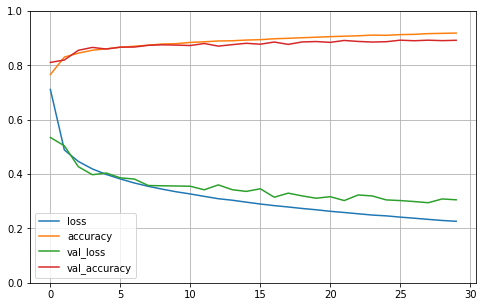

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [ ]:
X_new = x_test[:3]

In [ ]:
y_proba=model.predict(X_new)

In [ ]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [ ]:
np.array(class_name)[y_pred]

array(['Ankel boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
np.array(class_name)[y_test[:3]]

array(['Ankel boot', 'Pullover', 'Trouser'], dtype='<U11')